![alt text](https://github.com/DarleySoares/Data-Science/blob/master/Machine%20Learning:%20%20Naufr%C3%A1gio%20do%20Titanic/images/titanic.png?raw=true)

# Machine Learning: Naufrágio do Titanic

O RMS Titanic era o maior navio do mundo, em 1912. Podendo transportar 3457 pessoas com velocidade e conforto. Os preços de suas luxosas acomodações, principalmente da primeira classe, custavam valores absurdos - 4350 dólares somente de ida.

Sua primeira e última viagem seria de Southampton, na Inglaterra, para Nova Iorque nos Estados Unidos. Nessa viagem estavam à bordo no navio 892 tripulantes e 1320 passageiros, sendo que sua capacidade máxima era de 2435 passageiros.

Os passageiros que compunham a embarcação eram formados de uma mistura da sociedade Eduardiana, um conjunto de milhonários, até imigrantes pobres de países tão dispersos como Armênia, Irlanda, Itália, Suécia, Síria e Rússia que buscavam uma nova vida na América.

O naufrágio se deu devido uma colisão com um icerbeg que estava a deriva do mar, vindo da Groelândia. Nos preparativos de abandonar o navio, o capitão ordenou os preparativos de liberar os botes salva vidas, entretanto, abaixo dos decks a água já estava entrando nos níveis mais baixos da embarcação.

Para avisar os passageiros e os ajuda-los, os camareiros eram divididos entre as três classes de acomodações(1ª, 2ª e 3ª classe), sendo que os 3ª classe foram deixados a própria sorte sobre a necessidade de subir ao convés.
O Titanic era equipado com 20 botes salva-vidas, sendo que cada um deles poderia comportar até 68 pessoas, somando num total 1178 pessoas, quase metade dos passageiros. 

A ordem que foi lançada inicialmente para evacuação foi "colocar as mulheres e crianças dentro e abaixar", o oficial do lado bombordo interpretou mulheres e crianças primeiro e o oficial do lado estibordo somente mulheres e crianças.
Essa segunda atitude levou a abaixar botes com lugares vazios, porém incompletos por não saberem a capacidade máxima.

Com o intuito de descobrir quais foram os passageiros que morreram devido o acidente, esse projeto será focado em analisar os dados dos passageiros e construir um modelo de Machine Learning para realizar a previsão se o passageiro sobreviveu ou morreu.



## 1 - Coleta dos dados

Para a construção do modelo preditivo, os dados que serão analisados estão separados em dois arquivos com extensão *.csv*, que são dados para treinamento **(train.csv)** e para teste **(test.csv)**. O arquivo de treinamento contém 891 linhas e 12 colunas, sendo **Survived** a variável alvo; e o arquivo de teste contém 418 linhas e 11 colunas.

Para coletar esses dados, ambos os arquivos serão transferidos para uma estrutura de DataFrame, da biblioteca *pandas*, e logo em sequência serão concatenados para facilitar no tratamento das informações.

In [0]:
# Não mostrar avisos
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Importação dos pacotes que serão utilizados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# configuração das cores dos gráficos
sns.set_palette(sns.diverging_palette(220, 20, n=2))
alpha = 0.8

# Criação das variáveis para fazer processamento de variáveis dummies e 
# padronização dos dados
labelencoder =  LabelEncoder()
scaler = StandardScaler()


In [0]:
# Leitura dos datasets de treinamento e teste do modelo
df_treino = pd.read_csv('https://raw.githubusercontent.com/DarleySoares/Data-Science/master/Machine%20Learning%3A%20%20Naufr%C3%A1gio%20do%20Titanic/data/train.csv')
df_teste = pd.read_csv('https://raw.githubusercontent.com/DarleySoares/Data-Science/master/Machine%20Learning%3A%20%20Naufr%C3%A1gio%20do%20Titanic/data/test.csv')

# Salva os ID's dos passageiros para submissão final
passageiros = df_teste.PassengerId

# Concatena em um dataset o conjunto de treinamento e conjunto de teste para 
# realizar tratativas
df = df_treino.append(df_teste, ignore_index= True)

# Limite para separação dos dataframes no futuro
limite_treino = len(df_treino)
limite_teste = len(df) - len(df_teste)

##2 - Análise Exploratória

A primeira etapa do processo é identificar o problema e características dele. Saber quais são suas features, sua variável alvo, tamanho do DataFrame, informações das variáveis e análise estatística.

In [4]:
# Informa o tamanho do novo dataset
print('DIMENSÃO DO DATAFRAME\n')
print('LINHAS:  {}'.format(df.shape[0]))
print('COLUNAS: {}'.format(df.shape[1]))

DIMENSÃO DO DATAFRAME

LINHAS:  1309
COLUNAS: 12




Com as primeiras 5 linhas do conjunto de dados é possivel ter uma visão superficial das variáveis contidas nesse conjunto, como também se são variáveis numéricas ou categóricas, discreta ou contínua, nominal ou ordinal.

In [5]:
# Imprime primeiras 5 linhas do dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Para melhor classificar o tipo de variável utiliza-se a função dtypes para classificar realmente cada variável.É possível verificar que estamos trabalhando com variáveis numéricas discretas e contínuas, como também variáveis categóricas ordinal e nominal.

In [6]:
# classifica o tipo de cada variável
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Outra etapa importante é uma descrição estatística desse conjunto de dados como média, valor mínimo e máximo, como também verificar se existem dados faltantes no conjunto.

In [7]:
# Descrição estatística do conjunto de dados
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


Na descrição estatística acima é possível verificar que existem algumas variáveis que não estão com a contagem com o valor de 1309, que representa todas as linhas preenchidas, asssim, é nececessário verificar quais variáveis possuem valores ausentes para realizar as devidas tratativas em cada um. Para a variável Survived o valor 418 representa as linhas do conjunto de dados de treinamento, ou seja, a variável alvo que desejamos descobrir.

In [8]:
# verificando quais variáveis possuem valores ausentes
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

A coluna *PassengerId* será delatada por não agregar informação ao dataset

In [0]:
# Exclusão da coluna PassengerId
df.drop(['PassengerId'], axis = 1, inplace = True)
df_treino.drop(['PassengerId'], axis = 1, inplace = True)
df_teste.drop(['PassengerId'], axis = 1, inplace = True)

Utilizando o DataFrame de treino, iremos verificar como está a distribuição de sobreviventes e óbitos no conjunto. No conjunto de treino a coluna 'Survived' representa a situação final de cada passageiro:

**0:** Passageiro que morreu

**1:** Passageiros que sobreviveu

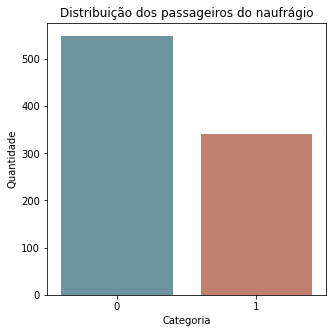

DESCRIÇÃO
0 - Não sobreviventes
1 - Sobreviventes

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [10]:
# gráfico de barras com quantidade de passageiros que sobreviveram e morreram
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data = df_treino, x = 'Survived', y = df.Survived.value_counts(), alpha = alpha)
ax.set_title('Distribuição dos passageiros do naufrágio')
ax.set_xlabel('Categoria')
ax.set_ylabel('Quantidade')
plt.show()

print('DESCRIÇÃO\n0 - Não sobreviventes\n1 - Sobreviventes\n')
print(df_treino.Survived.value_counts() / df_treino.shape[0])

Para descobrir melhor como está a relação entre as variáveis, como também para tentar descobrir algum padrão para a classe 0 e 1, os gráficos de distribuição são interessantes para verificar esses pontos. As variáveis categóricas não aparecerão nos gráficos abaixo, precisamos transforma-las em numéricas para conseguir plota-las

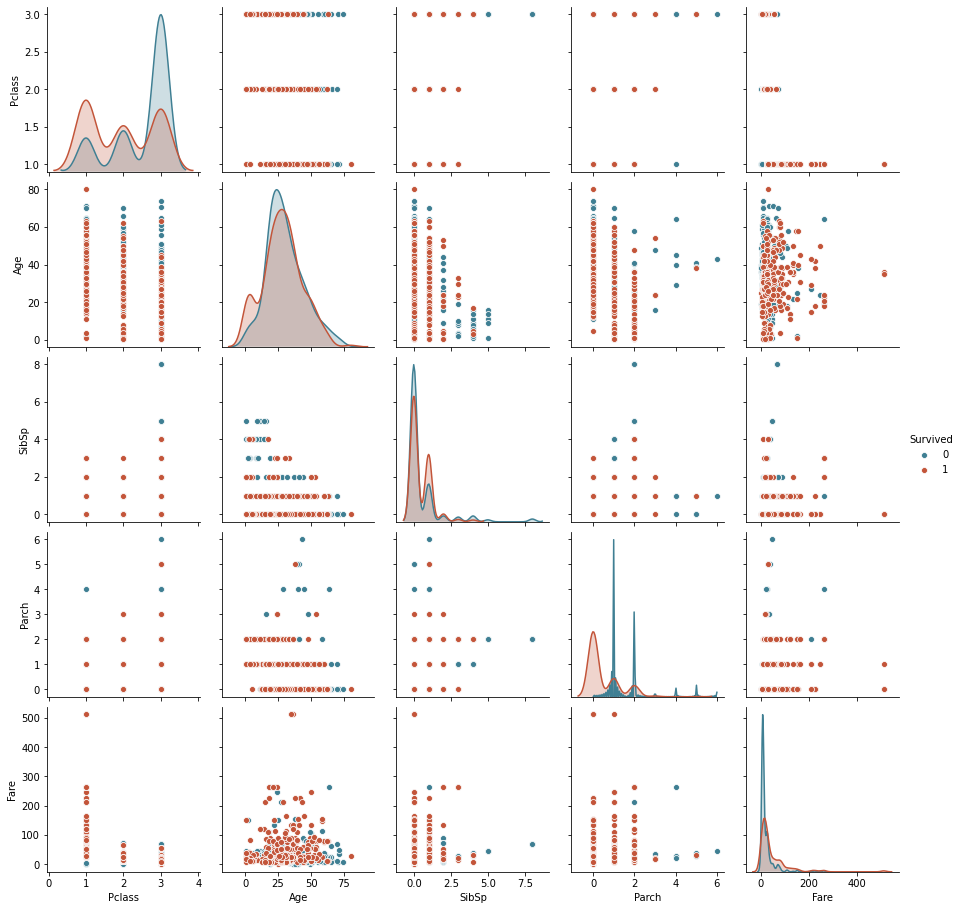

In [11]:
# Correlação entre as variáveis
sns.pairplot(df_treino, hue = 'Survived')
plt.show()

Coisas que já são possíveis perceber com esses gráficos são que os sobreviventee têndem a viajar sozinhos ou acompanhados de até 2 pessoas. Como também que os passageiros da 3ª classe estão mais propícios a morrer.

##3- Pré processamento dos dados

Antes de montar o modelo Random Forest, na etapa de pré processamento dos dados serão tratados todos os dados que estão ausentes, transformações de variáveis categóricas em numéricas, inserção de feature engeneering e padronização dos dados. Para realizar todo esses processos será utilizado a biblioteca *sklearn.preprocessing* que já foi importado no começo do notebook.


Os nomes não interferem num passageiro morrer ou não, porém verificando sua estrutura existem os títulos agregados nos nomes, e isso pode ser muito importante para determinar correlação entre faixa etária e social dos passageiros. Como algumas classes são raras, existindo poucos dados, elas foram trocdas para outros mais genéricas.

In [12]:
# Como existem muitos dados com idade nulos, primeiro será verificado o título de cada passageiro, para
# conseguir detalhar melhor a faixa de idade e a média daquele grupo. 
df['Title'] = [name[1].strip().split('.')[0] for name in df.Name.str.split(',')]

# Normalizar os títulos para ficar apenas 6 categorias de títulos, retirando as que aparecem poucas vezes
normalizarTitulos = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

df.Title = df.Title.map(normalizarTitulos)
df.Title.value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

Para tratar os dados ausentes da idade, será utilizado exatamente os títulos de cada passageiro, porque assim não utiliza uma média geral que é superficial. Utiliza-se uma média de um grupo mais fechado categorizado por idadade.

In [0]:
# Cria uma tabela com agregação por sexo, classe e título para determinar a mediana de idades
agrupamento = df.groupby(['Sex','Pclass', 'Title'])
agrupamento.columns = ['Title', 'Quantidade']

# Substitui para os dados ausentes a mediana das idades
df.Age = agrupamento.Age.apply(lambda x: x.fillna(x.mean()))

Para os dados ausentes do portão de embarque é utilizado o portão que aparece com maior frequência, isso não irá interferir na análise, uma vez que existem poucos dados faltantes para essa coluna.

In [0]:
# Calcula a moda do portão de embarque para os itens não nulos de coluna 'Embarked' e substituindo nos dados faltantes

modaEmbarked = df.Embarked.loc[pd.notna(df.Embarked)].mode().to_string(index = False).strip()
modaEmbarked
df.Embarked.fillna(modaEmbarked,inplace = True)

Como só existe uma linha com tarifa ausente, seu tratamento será bem particular, será olhando para a tarifa média dos passageiros da mesma classe que ele.

In [0]:
# Calcula a média da tarifa média para um passageiro da classe 3
mediaTare = df.Fare.loc[pd.notna(df.Fare)][df.Pclass == 3].mean()
df.Fare.fillna(mediaTare, inplace = True)

Essa coluna é a que apresenta maior número de dados ausentes, basicamente 70% deles. Para ela a tratativa será inserir a letra U de *unknow* para identifica-las e deixar somente a primeira letra da cabine, com isso conseguimos a informação em qual andar os passageiros estavam alocados:

**A:** Cabines da 1ª Classe

**B:** Cabines da 1ª Classe

**D:** Cabines da 1ª Classe na frente e da 3ª Classe nos fundos

**F:** Cabines da 3ª Classe na frente, no médio  da 2ª Classe e no fundo da 3ª Classe


In [16]:
# Para as cabines que estão com dados ausente será inserido a letra U de unknow
df.Cabin = df.Cabin.fillna('U')

# Determinar a primeira letra da cabine para saber qual setor a cabine se localizava
df.Cabin = df.Cabin.map(lambda x: x[0])

df.Cabin.value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

Na etapa de feature engeneering será criado uma coluna com o tamanho da família que o passageiro estava viajando. Esse dado é importante por que como foi analisado na parte na análise exploratória que viajar com mais de 3 pessoas afetava na probabilidade de sobrevivência do passageiro.

In [0]:
# Determinar o tamanho das famílias utilizando as colunas Parch e SibSp
df['FamilySize'] = df.Parch + df.SibSp + 1  

Nessa etapa as variáveis categóricas serão transformadas em variáveis numéricas. Cada categoria assumirá um número. Esse processo será realizado para as colunas *Sex*, *Embarked*, *Title* e *Cabin*. Aproveitando essa etapa as colunas *Name* e *Ticket* serão excluídas para não afetarem na performance do modelo.

In [18]:
# As variáveis categóricas devem ser alteradas para variáveis discretas, representando um número
# isso é necessário para o funcionamento do algorítmo de classificiação

df.Sex = labelencoder.fit_transform(df.Sex)
df.Embarked = labelencoder.fit_transform(df.Embarked)
df.Title = labelencoder.fit_transform(df.Title)
df.Cabin = labelencoder.fit_transform(df.Cabin)

df.drop(['Name', 'Ticket'], axis = 1, inplace= True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0.0,3,1,22.0,1,0,7.2500,8,2,2,2
1,1.0,1,0,38.0,1,0,71.2833,2,0,3,2
2,1.0,3,0,26.0,0,0,7.9250,8,2,1,1
3,1.0,1,0,35.0,1,0,53.1000,2,2,3,2
4,0.0,3,1,35.0,0,0,8.0500,8,2,2,1


Como todos os dados já foram tratados, faltando somente a padronização dos dados, os DataFrames serão divididos novamente para treino e teste. A variável alvo será transformada para um número discreto, como também será excluída essa coluna do conjunto de dados de teste.

In [0]:
# Separação entre dataset de treino e teste
treino = df[:limite_treino]
teste = df[limite_treino:]

# Transformar variável em discreta
treino.Survived = treino.Survived.astype(int)

# Exclusão da coluna da variávél alvo no conjunto de teste
teste =  teste.drop(['Survived'], axis = 1)

### 3.1 - Análise exploratória após pré processamento

Após o pré processamento dos dados é possível verificar também as variáveis que estavam categóricas. Analisando as duas principais categorias:

**Sex:** Essa variável possui uma correlação negativa com a variável alvo, significando que mulheres têndem a sobreviver mais que homens.

**Pclass:** Essa variável também possui uma correlação negativa, significando que pessoas da 3ª classe tendêm a morrer no naufrágio do Titanic.

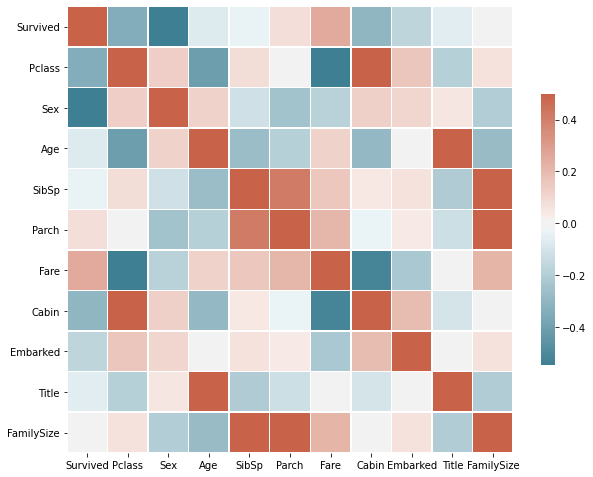

In [20]:
# Matriz de correlação
corr = treino.corr()
f, ax = plt.subplots(figsize= (10, 10))
cmap = sns.diverging_palette(220,20, as_cmap= True)
sns.heatmap(corr, cmap = cmap, vmax = 0.5, center = 0, square = True, linewidths= .5, cbar_kws= {'shrink': .5})
plt.show()

Como analisamos a correlação negativa no sexo, vamos plotar o gráfico para verificar a porcentagem de sobreviventes e mortos por sexo.

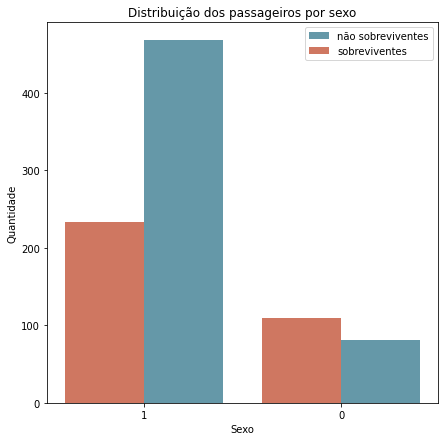

SOBREVIVENTES

Mulheres: 0.6812865497076024
Homens: 0.31871345029239767

NÃO SOBREVIVENTES

Mulheres: 0.14754098360655737
Homens: 0.8524590163934426


In [21]:
# Verificação de sobreviventes e não sobreviventes por sexo
labels = treino.Sex.value_counts().index
sobreviventes = treino.loc[treino.Survived == 1].Sex.value_counts()
naoSobreviventes = treino.loc[treino.Survived == 0].Sex.value_counts()

x = np.arange(len(labels))
width = 0.4
fig, ax = plt.subplots(figsize = (7,7))

# Configuração das cores dos gráficos

rects2 = ax.bar(x + width/2, naoSobreviventes, width, label = 'não sobreviventes', alpha = alpha)
rects1 = ax.bar(x - width/2, sobreviventes, width, label = 'sobreviventes', alpha = alpha)

ax.set_ylabel('Quantidade')
ax.set_xlabel('Sexo')
ax.set_title('Distribuição dos passageiros por sexo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

print('SOBREVIVENTES\n')
print('Mulheres: {}'.format(treino.Sex.loc[treino.Survived == 1][treino.Sex == 0].count() / 
      treino.Sex.loc[treino.Survived == 1].count()))
print('Homens: {}'.format(treino.Sex.loc[treino.Survived == 1][treino.Sex == 1].count() / 
      treino.Sex.loc[treino.Survived == 1].count()))
print('\nNÃO SOBREVIVENTES\n')
print('Mulheres: {}'.format(treino.Sex.loc[treino.Survived == 0][treino.Sex == 0].count() / 
      treino.Sex.loc[treino.Survived == 0].count()))
print('Homens: {}'.format(treino.Sex.loc[treino.Survived == 0][treino.Sex == 1].count() / 
      treino.Sex.loc[treino.Survived == 0].count()))

Como foi possível visualizar acima as mulheres possuem 68% de chance de sobreviverem devido a técnica adotada de "mulheres e crianças primeiro", já os homens tem 85% de chance de morrer no naufrágio. Como analisamos já a chance de sobreviver e morrer, vamos ver se existe alguma faixa de idade que indica algum padrão, assim, vamos plotar um histograma das idades, subdivididos por sexo e sobrevivência ou não.

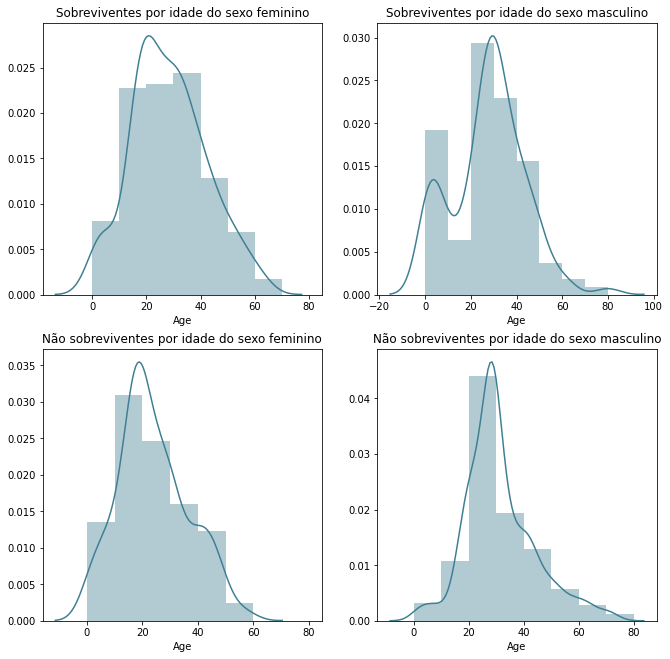

In [22]:
# Distribuição de idades para os sobreviventes

FemIdadeSobreviventes = treino.Age.loc[treino.Survived == 1][treino.Sex == 0]
FemIdadeNaoSobreviventes = treino.Age.loc[treino.Survived == 0][treino.Sex == 0]

MascIdadeSobreviventes = treino.Age.loc[treino.Survived == 1][treino.Sex == 1]
MascIdadeNaoSobreviventes = treino.Age.loc[treino.Survived == 0][treino.Sex == 1]

fig, ax = plt.subplots(figsize = (11,11))
plt.subplot(2,2,1)
sns.distplot(FemIdadeSobreviventes, bins = [0,10,20,30,40,50,60,70,80])
plt.title('Sobreviventes por idade do sexo feminino')
plt.subplot(2,2,2)
sns.distplot(MascIdadeSobreviventes, bins = [0,10,20,30,40,50,60,70,80])
plt.title('Sobreviventes por idade do sexo masculino')

plt.subplot(2,2,3)
sns.distplot(FemIdadeNaoSobreviventes, bins = [0,10,20,30,40,50,60,70,80])
plt.title('Não sobreviventes por idade do sexo feminino')

plt.subplot(2,2,4)
sns.distplot(MascIdadeNaoSobreviventes, bins = [0,10,20,30,40,50,60,70,80])
plt.title('Não sobreviventes por idade do sexo masculino')

plt.show()

Pode-se observar que a distribuição para os passageiros do sexo feminino estão bem distribuidos, entretanto para o sexo masculino, ente 20 e 30 anos é mais propício a não sobrevivência. Para finalizar as análises, verificando as classes, é possível ver que passageiros da 3ª classe são os que tiveram maior diferença entre sobreviver e morrer, isso se deve pela localização das cabines no navio.

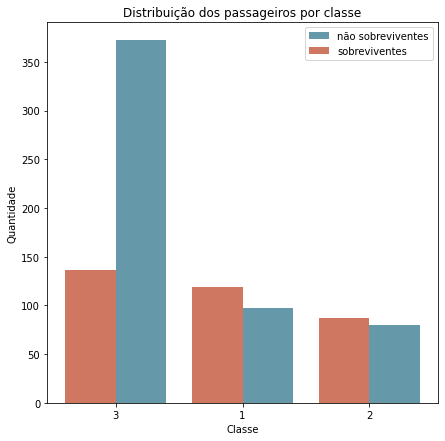

In [23]:
# Verificação de sobreviventes e não sobreviventes por classe
labels = df.Pclass.value_counts().index
sobreviventes = df.loc[df.Survived == 1].Pclass.value_counts()
naoSobreviventes = df.loc[df.Survived == 0].Pclass.value_counts()

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize = (7,7))

rects2 = ax.bar(x + width/2, naoSobreviventes, width, label = 'não sobreviventes', alpha = alpha)
rects1 = ax.bar(x - width/2, sobreviventes, width, label = 'sobreviventes', alpha = alpha)

ax.set_ylabel('Quantidade')
ax.set_xlabel('Classe')
ax.set_title('Distribuição dos passageiros por classe')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

Agora que já analisamos todos os dados principais, é hora da etapa de final da preparação dos dados. Inicialmente será criado variáveis X e y para treino e X para teste, sendo que na variável X de treino não conterá a variável alvo, porque ela ficará na variável y.  

Depois de realizar essa separação iremos realizar a padronização desses dados utilizando o método *StandardScaled*, para colocar todas as variáveis na mesma escala, isso é importante para o modelo não assumir que uma classe tem mais importância que a a outra.

In [0]:
# Separação entre features e target
X_treino = treino.drop(columns= ['Survived'])
y_treino = treino.Survived
X_teste = teste

In [0]:
# Padronização dos DataFrames
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.fit_transform(X_teste)

##4 - Modelo preditivo

Para o modelo preditivo estamos utilizando o Random Forest. É um algorítmo com performance boa para classificação, como queremos prever entre duas classes (sobreviveu e não sobreviveu) iremos testar primeiro quais os parâmetros que mais influenciam no modelo, possuem maior peso para definir os parâmetros do modelo.

Em seguida, o modelo será treinado com o conjunto de treinamento com as diversas árvores de decisão. Por fim, será submetido o conjunto de teste par conseguirmos verificar o resultado para submeter ao Kaggle.

In [0]:
# Range de parâmetros para o modelo
parametros = dict(
    criterion = ['gini', 'entropy'],
    max_depth = [n for n in range(7,10)],
    min_samples_split = [n for n in range(3,9)],
    min_samples_leaf = [n for n in range(3,9)],
    n_estimators = [n for n in range(80,100,10)]
)

In [0]:
modelo = RandomForestClassifier(random_state= 0)
modeloCV = GridSearchCV(estimator = modelo, param_grid = parametros, cv = 5, n_jobs = -1)

In [28]:
modeloCV.fit(X_treino, y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [29]:
print('Melhor resultado: {}'.format(modeloCV.best_score_))
print('Parâmetros: {}'.format(modeloCV.best_estimator_))

Melhor resultado: 0.8316427091833531
Parâmetros: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [30]:
# testa o modelo preditivo gerado
y_teste = modeloCV.predict(X_teste)
pd.Series(y_teste).value_counts()

0    263
1    155
dtype: int64

In [0]:
dados_finais = pd.concat([pd.Series(passageiros.values, name = 'PassengerId'),pd.Series(y_teste, name = 'Survived')], axis = 1)
dados_finais.to_csv('submission.csv', index = False)